## 1. Import libraries, test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')

# We only care about the annual income and spending score
x = dataset.iloc[:, [3, 4]].values

## 2. Apply Feature scaling

This is minimize the feature value so that it'll not only be easier to work with and the data prediction comes out more accurately.

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

## 3. Find the optimal number of parameters

We choose the optimal number as the one with the least errors

    Epsilon  Min samples  Errors  Clusters  Variance
0       0.3            3      14         9      6.67
1       0.3            4      23         8      5.25
2       0.4            2       6         6      2.92
3       0.4            3      10         4      1.25
4       0.4            4      14         3      0.67
5       0.4            5      15         4      1.25
6       0.4            6      19         4      1.25
7       0.4            7      20         4      1.25
8       0.4            8      25         5      2.00
9       0.5            1       0         7      4.00
10      0.5            2       3         4      1.25
11      0.5            9      17         3      0.67
12      0.5           10      21         4      1.25 



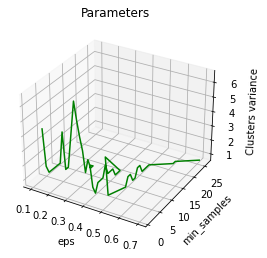

In [3]:
from sklearn.cluster import DBSCAN
from itertools import product
from more_itertools import bucket

min_clusters_no = 3
max_clusters_no = 10
min_errors_no = 25

params_x_1 = []
params_x_2 = []
params_y = []
df_rows = []

for params in product(range(1, 11, 1), range(1, 50, 1)):
    eps = round(params[0] * 0.1, 1)
    min_samples = params[1]

    params_model = DBSCAN(eps=eps, min_samples=min_samples)
    params_bucket = bucket(params_model.fit_predict(x), lambda x: x)
    clusters = []
    errors_no = 0

    for i in list(params_bucket):
        samples_no = len(list(params_bucket[i]))
        
        if not samples_no:
            continue
        elif i == -1:
            errors_no = samples_no
            continue
        
        clusters.append([i, samples_no])

    if max_clusters_no >= len(clusters) >= min_clusters_no:
        var_of_clusters = np.round(np.var(np.array(clusters), axis=0)[0], 2)

        if errors_no <= min_errors_no:
            df_rows.append([eps, min_samples, errors_no, len(clusters), var_of_clusters])
        
        params_x_1.append(eps)
        params_x_2.append(min_samples)
        params_y.append(var_of_clusters)            
            
print(pd.DataFrame(df_rows, columns=['Epsilon', 'Min samples', 'Errors', 'Clusters', 'Variance']), '\n')            

plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Parameters')
ax.set_xlabel('eps', linespacing=3.2)
ax.set_ylabel('min_samples', linespacing=3.1)
ax.set_zlabel('Clusters variance')
ax.plot3D(params_x_1, params_x_2, params_y, 'green')

## 4. Training the DBSCAN model

We select `min_samples=8` and `eps=0.4` as our above optimal number.

In [4]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.4, min_samples=8)
y_clusters = model.fit_predict(x)

## 5. Display graph and details

Each cluster are colored according to their respective colors. The noise are 

Param epsilon:  0.4
Param min samples:  8
Distance metric:  euclidean
No. of clusters:  5
No. of noise points:  25
No. of core points:  137


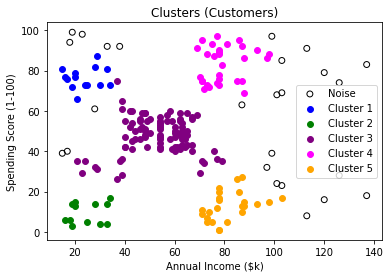

In [5]:
x_inverse = sc.inverse_transform(x)

print('Param epsilon: ', model.get_params()["eps"])
print('Param min samples: ', model.get_params()["min_samples"])
print('Distance metric: ', model.get_params()["metric"])
print('No. of clusters: ', len(list(bucket(filter(lambda x: x > -1, model.labels_), lambda x: x))))
print('No. of noise points: ', len(list(filter(lambda x: x == -1, model.labels_))))
print('No. of core points: ', len(model.core_sample_indices_))

plt.scatter(x_inverse[y_clusters == -1, 0], x_inverse[y_clusters == -1, 1], s=35, facecolors='none', edgecolors='black', label='Noise')

for i, label in enumerate([
    ('blue', 'Cluster 1'),
    ('green', 'Cluster 2'),
    ('purple', 'Cluster 3'),
    ('magenta', 'Cluster 4'),
    ('orange', 'Cluster 5')
]):
    plt.scatter(x_inverse[y_clusters == i, 0], x_inverse[y_clusters == i, 1], s=35, c=label[0], label=label[1])

plt.title('Clusters (Customers)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()